**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Análisis Avanzado de Datos

**Departamento:** Ingeniería Aeroespacial

**Facultad de Ingeniería - Universidad de Antioquia**

# Aprendizaje Supervisado Parte 4

In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.1 MB 30 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.4-py2.py3-none-any.whl size=177128127 sha256=8674243c13805024ab22c98829471419e05c811f502b31508048d20f20f69e34
  Stored in directory: /root/.cache/pip/wheels/02/f9/18/5fbae4db903beda26f764b6e035cb41b37713fed8a6b9cd403
Successfully built h2o


In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import requests
import io

from sklearn.model_selection import train_test_split # Esta clase realiza la partición de datos en entrenamiento y prueba
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel # Se carga el método de selección de características basado en modelos
from sklearn.ensemble import VotingClassifier # Voto Mayoritario para Clasificación
from sklearn.model_selection import StratifiedKFold # Validación Cruzada Estratificada
from sklearn.model_selection import cross_val_score # Validación Cruzada Mejorada
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV # Búsqueda de cuadrículas
from sklearn.ensemble import StackingClassifier # Stacking
import h2o # AutoML

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier # Se llama a la librería del método Random Forest
from sklearn.ensemble import HistGradientBoostingClassifier # Histogram Gradient Boosting Classifier
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
from sklearn.linear_model import LogisticRegression # Regresión Logística
from sklearn.metrics import fbeta_score # Métrica F beta
from sklearn.metrics import classification_report # Para generar un reporte general de la clasificación
from sklearn.metrics import confusion_matrix # Matriz de confusión

In [ ]:
url_1 = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Sensorless_drive_diagnosis.txt"
download = requests.get(url_1).content
data_1 = pd.read_table(io.StringIO(download.decode('utf-8')), sep=' ',
                     decimal = ',')
# Es importante codificarlo a utf-8
display(data_1.head(20))

,S1_Mean,S1_Std,S1_Skewness,S1_Kurt,S2_Mean,S2_Std,S2_Skewness,S2_Kurt,S3_Mean,S3_Std,...,S10_Kurt,S11_Mean,S11_Std,S11_Skewness,S11_Kurt,S12_Mean,S12_Std,S12_Skewness,S12_Kurt,Label
0,-3.0146e-07,8.2603e-06,-1.1517e-05,-2.3098e-06,-1.4386e-06,-2.1225e-05,0.031718,0.03171,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,2.9132e-06,-5.2477e-06,3.3421e-06,-6.0561e-06,2.7789e-06,-3.7524e-06,0.030804,0.03081,0.030806,-0.03352,...,-0.59314,7.6252,6.169,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,-2.9517e-06,-3.184e-06,-1.592e-05,-1.2084e-06,-1.5753e-06,1.7394e-05,0.032877,0.03288,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1
3,-1.3226e-06,8.8201e-06,-1.5879e-05,-4.8111e-06,-7.2829e-07,4.1439e-06,0.02941,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,1
4,-6.8366e-08,5.6663e-07,-2.5906e-05,-6.4901e-06,-7.9406e-07,1.3491e-05,0.030119,0.030119,0.030145,-0.031393,...,-0.6301,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,1
5,-9.5849e-07,5.2143e-08,-4.7359e-05,6.4537e-07,-2.3041e-06,5.4999e-05,0.031154,0.031154,0.031201,-0.032789,...,-0.61124,5.8337,18.697,-1.4956,-1.4956,-1.4956,-1.4973,-1.4972,-1.4973,1
6,-1.7837e-06,1.3036e-06,-3.7851e-05,-7.0839e-06,6.7063e-06,2.2074e-05,0.033805,0.033804,0.033841,-0.033345,...,-0.62501,17.618,9.0823,-1.496,-1.496,-1.4959,-1.4954,-1.4954,-1.4953,1
7,-2.5666e-06,-1.6795e-07,1.4838e-05,-1.5984e-06,8.7092e-07,1.4961e-05,0.031071,0.031071,0.031056,-0.029695,...,-0.63618,12.838,4.9079,-1.499,-1.499,-1.499,-1.4968,-1.4968,-1.4968,1
8,-5.474e-06,1.0865e-07,-1.0972e-05,-1.8156e-06,4.7578e-07,2.3783e-05,0.031309,0.031308,0.031319,-0.031344,...,-0.62465,2.9841,6.6883,-1.4955,-1.4955,-1.4955,-1.4947,-1.4947,-1.4947,1
9,2.8256e-06,6.0676e-06,0.00011821,-4.3475e-06,1.4923e-06,-2.9171e-06,0.030947,0.030941,0.030823,-0.032171,...,-0.5817,2.0511,8.8939,-1.4963,-1.4963,-1.4963,-1.4943,-1.4943,-1.4943,1


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58509 entries, 0 to 58508
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S1_Mean       58509 non-null  object
 1   S1_Std        58509 non-null  object
 2   S1_Skewness   58509 non-null  object
 3   S1_Kurt       58509 non-null  object
 4   S2_Mean       58509 non-null  object
 5   S2_Std        58509 non-null  object
 6   S2_Skewness   58509 non-null  object
 7   S2_Kurt       58509 non-null  object
 8   S3_Mean       58509 non-null  object
 9   S3_Std        58509 non-null  object
 10  S3_Skewness   58509 non-null  object
 11  S3_Kurt       58509 non-null  object
 12  S4_Mean       58509 non-null  object
 13  S4_Std        58509 non-null  object
 14  S4_Skewness   58509 non-null  object
 15  S4_Kurt       58509 non-null  object
 16  S5_Mean       58509 non-null  object
 17  S5_Std        58509 non-null  object
 18  S5_Skewness   58509 non-null  object
 19  S5_K

In [ ]:
X = data_1.iloc[:,0:48] # Características
Y = data_1["Label"] # Vector de clases
X = X.astype(float)

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, train_size = 0.8, random_state = 17)
print("Tamaño de los Datos de Entrenamiento = ", X_Train.shape)
print("Tamaño de los Datos de Validación = ", X_Test.shape)
print("Tamaño del Vector de Clases de Entrenamiento = ", Y_Train.shape)
print("Tamaño del Vector de Clases de Prueba = ", Y_Test.shape)

Tamaño de los Datos de Entrenamiento =  (46807, 48)
Tamaño de los Datos de Validación =  (11702, 48)
Tamaño del Vector de Clases de Entrenamiento =  (46807,)
Tamaño del Vector de Clases de Prueba =  (11702,)


## Método de Combinación de Ingeniería de Características y Algoritmos de Clasificación

Uno de los grandes retos en Machine Learning es lograr un óptimo desempeño de los procesos de tratamiento de datos y creación de modelos que se pueda manejar en una misma escala, es decir, integrar ambos procesos en un **pipeline**. Por lo general, un **pipeline** es una función que toma un método de transformación de datos y lo acopla a un algoritmo de machine learning para crear un modelo, lo cual en muchos casos, esta estrategía permite generar un *metaestimador* o una *envolvente* que permite aplicar diferentes algoritmos en cadena. 

In [ ]:
Number_Muestras_por_Clase = Y_Train.value_counts()
Number_Muestras_por_Clase = Number_Muestras_por_Clase.sort_index(axis = 0, ascending = True)
print(Number_Muestras_por_Clase)

1     4291
2     4235
3     4240
4     4257
5     4227
6     4286
7     4199
8     4220
9     4311
10    4279
11    4262
Name: Label, dtype: int64


In [ ]:
Numero_de_Clases = len(Number_Muestras_por_Clase.index)
Peso_por_Clase = len(Y_Train)/(Numero_de_Clases*Number_Muestras_por_Clase)
print(Peso_por_Clase)

1     0.991653
2     1.004765
3     1.003581
4     0.999573
5     1.006667
6     0.992810
7     1.013380
8     1.008337
9     0.987052
10    0.994434
11    0.998400
Name: Label, dtype: float64


In [ ]:
pipe_modelo = make_pipeline(MinMaxScaler(),
                            PCA(n_components = 7, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False),
                            RandomForestClassifier(n_estimators = 300, criterion='gini', max_depth = 10, min_samples_split = 2, 
                            min_samples_leaf = 1, max_features='auto', bootstrap=True, 
                            class_weight =  {1: Peso_por_Clase[1], 2: Peso_por_Clase[2],
                                             3: Peso_por_Clase[3], 4: Peso_por_Clase[4],
                                             5: Peso_por_Clase[5], 6: Peso_por_Clase[6],
                                             7: Peso_por_Clase[7], 8: Peso_por_Clase[8],
                                             9: Peso_por_Clase[9], 10: Peso_por_Clase[10], 
                                             11: Peso_por_Clase[11]}, ccp_alpha = 0.0))

In [ ]:
pipe_modelo.fit(X_Train, Y_Train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('pca', PCA(n_components=7, random_state=17, tol=0.001)),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight={1: 0.9916527192220503,
                                                      2: 1.004765482451433,
                                                      3: 1.0035806174957118,
                                                      4: 0.9995728959788156,
                                                      5: 1.0066670968019442,
                                                      6: 0.9928095702710729,
                                                      7: 1.0133798090454438,
                                                      8: 1.0083369237397672,
                                                      9: 0.9870521498913983,
                                                      10: 0.9944337037115724,
                                                      11: 0.998

In [ ]:
Y_Predicho = pipe_modelo.predict(X_Test)

In [ ]:
Puntaje_1_1 = fbeta_score(Y_Test, Y_Predicho, average='micro', beta = 1)
Puntaje_1_2 = fbeta_score(Y_Test, Y_Predicho, average='micro', beta = 0.75)
Puntaje_1_3 = fbeta_score(Y_Test, Y_Predicho, average='micro', beta = 1.25)

Puntaje_2_1 = fbeta_score(Y_Test, Y_Predicho, average='macro', beta = 1)
Puntaje_2_2 = fbeta_score(Y_Test, Y_Predicho, average='macro', beta = 0.75)
Puntaje_2_3 = fbeta_score(Y_Test, Y_Predicho, average='macro', beta = 1.25)

In [ ]:
print("F1 Micro = {:.4f} %".format(100*Puntaje_1_1))
print("F_Beta(0.75) Micro = {:.4f} %".format(100*Puntaje_1_2))
print("F_Beta(1.25) Micro = {:.4f} %".format(100*Puntaje_1_3))

print("F1 Macro = {:.4f} %".format(100*Puntaje_2_1))
print("F_Beta(0.75) Macro = {:.4f} %".format(100*Puntaje_2_2))
print("F_Beta(1.25) Macro = {:.4f} %".format(100*Puntaje_2_3))

F1 Micro = 96.2314 %
F_Beta(0.75) Micro = 96.2314 %
F_Beta(1.25) Micro = 96.2314 %
F1 Macro = 96.1990 %
F_Beta(0.75) Macro = 96.1979 %
F_Beta(1.25) Macro = 96.2022 %


In [ ]:
Clases = ["Clase 1", "Clase 2", "Clase 3", "Clase 4", "Clase 5", "Clase 6", "Clase 7", "Clase 8", 
          "Clase 9", "Clase 10", "Clase 11"]

print(classification_report(Y_Test, Y_Predicho, target_names = Clases, digits = 4))

              precision    recall  f1-score   support

     Clase 1     0.9758    0.9805    0.9782      1028
     Clase 2     0.9671    0.9493    0.9581      1084
     Clase 3     0.9707    0.9815    0.9760      1079
     Clase 4     0.9386    0.9934    0.9652      1062
     Clase 5     0.9317    0.8864    0.9085      1092
     Clase 6     0.9544    0.9119    0.9327      1033
     Clase 7     1.0000    0.9991    0.9996      1120
     Clase 8     0.9650    0.9536    0.9593      1099
     Clase 9     0.9316    0.9593    0.9453      1008
    Clase 10     0.9492    0.9702    0.9596      1040
    Clase 11     0.9991    1.0000    0.9995      1057

    accuracy                         0.9623     11702
   macro avg     0.9621    0.9623    0.9620     11702
weighted avg     0.9624    0.9623    0.9621     11702



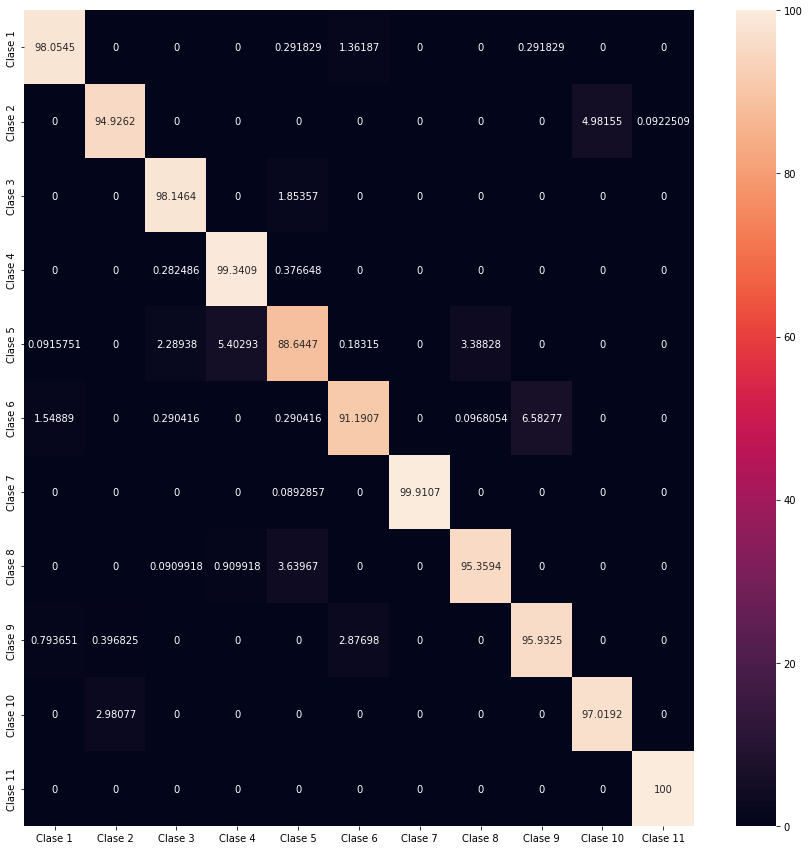

In [ ]:
Matriz = confusion_matrix(y_true = Y_Test, y_pred = Y_Predicho, normalize = 'true')

plt.figure(figsize=(15,15))
ax = sns.heatmap(100*Matriz, annot = True, fmt = 'g', xticklabels = Clases, yticklabels = Clases)
plt.show()

## Método de Selección de Modelos

Esta estrategía usa un modelo de aprendizaje supervisado para juzgar la relevancia de cada característica y almacenar solamente las más importantes. Por lo general, este tipo de estrategía considera todas las características de una vez para capturar la relación entre ellas. Además, el método permite mezclar diferentes algoritmos de aprendizaje automático, donde un algoritmo se utiliza para la selección de características, y el otro algoritmo se emplea para construir un modelo que es evaluado en la etapa validación.

In [ ]:
Seleccion_Modelos = SelectFromModel(RandomForestClassifier(n_estimators = 100, criterion='gini', max_depth = 10, min_samples_split = 2, 
                            min_samples_leaf = 1, max_features='auto', bootstrap=True, 
                            class_weight =  {1: Peso_por_Clase[1], 2: Peso_por_Clase[2],
                                             3: Peso_por_Clase[3], 4: Peso_por_Clase[4],
                                             5: Peso_por_Clase[5], 6: Peso_por_Clase[6],
                                             7: Peso_por_Clase[7], 8: Peso_por_Clase[8],
                                             9: Peso_por_Clase[9], 10: Peso_por_Clase[10], 
                                             11: Peso_por_Clase[11]}, ccp_alpha = 0.0), 
                                    threshold = "median", max_features = None) 
# Se construye la selección basado en modelos, donde puedes colocar un algoritmo de aprendizaje automática para construir
# un modelo. El parámetro Threshold es un umbral que se define el modelo basado en la mediana pero se puede cambiar por:
# “mean”

In [ ]:
Seleccion_Modelos.fit(X_Train, Y_Train)

SelectFromModel(estimator=RandomForestClassifier(class_weight={1: 0.9916527192220503,
                                                               2: 1.004765482451433,
                                                               3: 1.0035806174957118,
                                                               4: 0.9995728959788156,
                                                               5: 1.0066670968019442,
                                                               6: 0.9928095702710729,
                                                               7: 1.0133798090454438,
                                                               8: 1.0083369237397672,
                                                               9: 0.9870521498913983,
                                                               10: 0.9944337037115724,
                                                               11: 0.9984002388976579},
                                                 max

In [ ]:
X_Train_Seleccionado = Seleccion_Modelos.transform(X_Train) # Se transforma los datos de entrenamiento
print(X_Train.shape) # Tamaño de las características originales
print(X_Train_Seleccionado.shape) # Tamaño de las características seleccionadas

(46807, 48)
(46807, 24)


[False False False False  True False  True  True  True  True  True  True
  True False False  True  True False  True  True  True  True  True  True
  True False False  True False False  True  True  True  True  True  True
 False False False False False False False False False False False False]


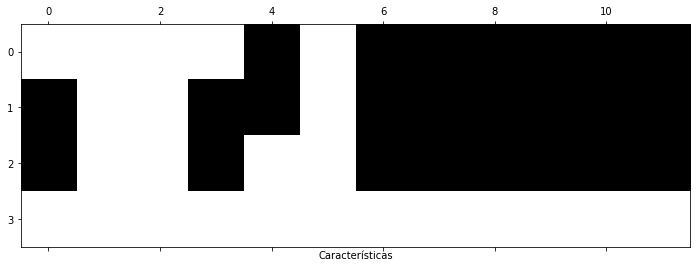

In [ ]:
Enmascarado = Seleccion_Modelos.get_support() # Se obtiene un enmascarado o indices enteros de las características seleccionadas
print(Enmascarado) # Si es True, significa que la característica fue seleccionada, y si es False, muestra la característica
                   # NO seleccionada 
plt.matshow(Enmascarado.reshape(4, -4), cmap = 'gray_r') # Muestra una trama del enmascarado, donde los cuadrados de color
                                                         # Negro son las características seleccionadas
plt.xlabel('Características') # Se coloca la etiqueta a la figura en el eje x en el enmascarado
plt.show() # Mostrar gráfica

In [ ]:
X_Test_Seleccionado = Seleccion_Modelos.transform(X_Test) # Se transforma los datos prueba

Modelo_Prueba = HistGradientBoostingClassifier(loss='auto', learning_rate = 0.1, max_iter = 1000, max_leaf_nodes = 31, 
                                       max_depth = 10, min_samples_leaf = 20, l2_regularization = 0.1, scoring='loss', 
                                       validation_fraction = 0.1, n_iter_no_change = 10, tol = 1e-5)
# Se define los parámetros de otro algoritmo de aprendizaje automático para la validación y prueba. En este caso, se seleccionó
# el algoritmo RandomForest pero pueden usar otra.
# n_estimators es el número de árboles en un bosque (considerando que es un método basado en árboles de decisión)

# Evaluación de los modelos
Puntaje_1 = Modelo_Prueba.fit(X_Train,Y_Train).score(X_Test, Y_Test)
Puntaje_2 = Modelo_Prueba.fit(X_Train_Seleccionado,Y_Train).score(X_Test_Seleccionado, Y_Test)

print("Puntaje de aciertos con todas las características = {:.4f} %".format(100*Puntaje_1))
print("Puntaje de aciertos con las características seleccionadas = {:.4f} %".format(100*Puntaje_2))

Puntaje de aciertos con todas las características = 99.8804 %
Puntaje de aciertos con las características seleccionadas = 99.8376 %


In [ ]:
Y_Predicho = Modelo_Prueba.predict(X_Test_Seleccionado)

In [ ]:
Clases = ["Clase 1", "Clase 2", "Clase 3", "Clase 4", "Clase 5", "Clase 6", "Clase 7", "Clase 8", 
          "Clase 9", "Clase 10", "Clase 11"]

print(classification_report(Y_Test, Y_Predicho, target_names = Clases, digits = 4))

              precision    recall  f1-score   support

     Clase 1     0.9990    0.9971    0.9981      1028
     Clase 2     0.9963    0.9954    0.9958      1084
     Clase 3     0.9972    1.0000    0.9986      1079
     Clase 4     1.0000    0.9991    0.9995      1062
     Clase 5     0.9991    0.9982    0.9986      1092
     Clase 6     0.9971    0.9990    0.9981      1033
     Clase 7     1.0000    0.9991    0.9996      1120
     Clase 8     0.9991    1.0000    0.9995      1099
     Clase 9     0.9990    0.9980    0.9985      1008
    Clase 10     0.9962    0.9962    0.9962      1040
    Clase 11     0.9991    1.0000    0.9995      1057

    accuracy                         0.9984     11702
   macro avg     0.9984    0.9984    0.9984     11702
weighted avg     0.9984    0.9984    0.9984     11702



## Método por Votación Mayoritaria

Es un método que permite combinar diferentes algoritmos de clasificación a partir de una asignación de pesos a cada modelo que genere el algoritmo. Lo anterior permite crear un **metaclasificador** que mitigue los errores de clasificación y de esta manera, se obtiene un modelo generalizado que compense los errores individuales de cada modelo de clasificación (es una interpretación similar al método Bagging visto en la Parte 3 del Aprendizaje Supervisado).

Por lo general, el voto mayoritario se expresa como:

$$y = arg \max_\limits{i} \sum_{j = 1}^M \omega_j f_A(C_j (x) = i)$$

donde $\omega_i$ es un peso relacionado con un modelo de clasificación $C_j$, $y$ es la clase estimada para un conjunto de datos $x$, $f_A(\cdot)$ es una función característica tal que $\lbrack C_j (x) = i \in A \rbrack$ y $A$ es un conjunto de clases únicas (el vector de clases). 

Por ejemplo, se establece que $C_1(x) \rightarrow 0$, $C_2(x) \rightarrow 0$, $C_3(x) \rightarrow 1$. Si escribimos $y$ como $y = moda \lbrace 0,0,1\rbrace = 0$, se observa que el vector de clases se repite más la etiqueta $0$ que $1$. Ahora bien, si asignamos un vector de pesos a cada clase, $\omega = \lbrace 0.3, 0.1, 0.6 \rbrace$, entonces:

$$y = arg \max_\limits{i} \lbrack 0.3 \cdot C_1 + 0.1 \cdot C_2 + 0.6 \cdot C_3\rbrack = 1$$

Como $C_3$ tiene mayor peso con respecto a $C_1$ y $C_2$, se selecciona la clase 1, ya que la suma del producto de $C_1$ y $C_2$ es menor que  $C_3$.

Una de las formas más utilizadas para el voto mayoritario es usar como función característica una función de densidad de probabilidad para equilibrar la ponderación entre los modelos de clasificación:

$$y = arg \max_\limits{i} \sum_{j = 1}^M \omega_j p_{i,j}$$

Por ejemplo, consideremos que cada modelo de clasificación genera una matriz de probabilidades:

$$ \mathbf{P} = \begin{bmatrix} 0.8 & 0.2 \\ 0.7 & 0.3 \\ 0.1 & 0.9\end{bmatrix}$$

La matriz $\mathbf{P}$ tiene un tamaño de $N$ muestras o filas de los datos y $C$ clases. Ahora consideremos un vector de pesos, $\mathbf{W} = \lbrack 0.2, 0.2, 0.6\rbrack$, tal que el cálculo de las probabilidades de cada clase se estima como:

$$p(C = 0 \vert x) = 0.2\cdot 0.8 + 0.2\cdot 0.7 + 0.6\cdot 0.1 = 0.36$$

$$p(C = 1 \vert x) = 0.2\cdot 0.2 + 0.2\cdot 0.3 + 0.6\cdot 0.9 = 0.64$$

$$y = arg \max_\limits{i} \lbrace 0.36, 0.64\rbrace = 1$$

En este caso, la clase con mayor voto mayoritario es 1. 

In [ ]:
MM = MinMaxScaler()
X_Norm = MM.fit_transform(X)
X_Norm_Train, X_Norm_Test, Y_N_Train, Y_N_Test = train_test_split(X_Norm, Y, test_size = 0.2, train_size = 0.8, random_state = 17)

In [ ]:
RF = RandomForestClassifier(n_estimators = 100, criterion='gini', max_depth = 10, min_samples_split = 2, 
                            min_samples_leaf = 1, max_features='auto', bootstrap=True, ccp_alpha = 0.0)

In [ ]:
HGB = HistGradientBoostingClassifier(loss='auto', learning_rate = 0.1, max_iter = 1000, max_leaf_nodes = 31, 
                                       max_depth = 10, min_samples_leaf = 20, l2_regularization = 0.1, scoring='loss', 
                                       validation_fraction = 0.1, n_iter_no_change = 10, tol = 1e-5)

In [ ]:
ADA = AdaBoostClassifier(n_estimators = 50, learning_rate=1.0, algorithm='SAMME.R')

In [ ]:
Voto_1 = VotingClassifier(estimators=[('Random Forest', RF), ('Histogram Gradient Boosting', HGB), 
                                      ('AdaBoost', ADA)], voting='hard')

Voto_2 = VotingClassifier(estimators=[('Random Forest', RF), ('Histogram Gradient Boosting', HGB), 
                                      ('AdaBoost', ADA)], voting='soft', weights = [0.4, 0.4, 0.2])

In [ ]:
Voto_1.fit(X_Norm_Train, Y_N_Train)
Voto_2.fit(X_Norm_Train, Y_N_Train)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(max_depth=10)),
                             ('Histogram Gradient Boosting',
                              HistGradientBoostingClassifier(l2_regularization=0.1,
                                                             max_depth=10,
                                                             max_iter=1000,
                                                             tol=1e-05)),
                             ('AdaBoost', AdaBoostClassifier())],
                 voting='soft', weights=[0.4, 0.4, 0.2])

In [ ]:
Clases_Voto_1 = Voto_1.predict(X_Norm_Test)
Clases_Voto_2 = Voto_2.predict(X_Norm_Test)

In [ ]:
Clases = ["Clase 1", "Clase 2", "Clase 3", "Clase 4", "Clase 5", "Clase 6", "Clase 7", "Clase 8", 
          "Clase 9", "Clase 10", "Clase 11"]

print(classification_report(Y_Test, Clases_Voto_1, target_names = Clases, digits = 4))

              precision    recall  f1-score   support

     Clase 1     0.9145    0.9990    0.9549      1028
     Clase 2     0.9981    0.9871    0.9926      1084
     Clase 3     1.0000    0.9870    0.9935      1079
     Clase 4     0.9981    0.9953    0.9967      1062
     Clase 5     1.0000    0.9615    0.9804      1092
     Clase 6     0.9990    0.9923    0.9956      1033
     Clase 7     1.0000    0.9991    0.9996      1120
     Clase 8     0.9982    0.9854    0.9918      1099
     Clase 9     1.0000    0.9861    0.9930      1008
    Clase 10     0.9895    1.0000    0.9947      1040
    Clase 11     0.9991    1.0000    0.9995      1057

    accuracy                         0.9902     11702
   macro avg     0.9906    0.9903    0.9902     11702
weighted avg     0.9909    0.9902    0.9903     11702



In [ ]:
Clases = ["Clase 1", "Clase 2", "Clase 3", "Clase 4", "Clase 5", "Clase 6", "Clase 7", "Clase 8", 
          "Clase 9", "Clase 10", "Clase 11"]

print(classification_report(Y_Test, Clases_Voto_2, target_names = Clases, digits = 4))

              precision    recall  f1-score   support

     Clase 1     0.9971    0.9981    0.9976      1028
     Clase 2     0.9963    0.9954    0.9958      1084
     Clase 3     1.0000    1.0000    1.0000      1079
     Clase 4     0.9991    1.0000    0.9995      1062
     Clase 5     1.0000    0.9991    0.9995      1092
     Clase 6     0.9971    1.0000    0.9986      1033
     Clase 7     1.0000    0.9991    0.9996      1120
     Clase 8     0.9982    0.9991    0.9986      1099
     Clase 9     1.0000    0.9940    0.9970      1008
    Clase 10     0.9962    0.9981    0.9971      1040
    Clase 11     0.9991    1.0000    0.9995      1057

    accuracy                         0.9985     11702
   macro avg     0.9985    0.9984    0.9984     11702
weighted avg     0.9985    0.9985    0.9985     11702



## Métodos de Ajuste de Hiperparámetros

### Validación cruzada con $n$-iteraciones

Este método divide aleatoriamente un conjunto de datos de entrenamiento en $n$ iteraciones **sin reemplazo** para garantizar una diversidad en la obtención del mejor modelo de clasificación. Cuando se habla de "sin reemplazo", quiere decir que se genera un remuestreo de los datos sin que se repita la secuencia u orden de las filas o muestras de los datos (como si aplicaras boostrapping). Por cada iteración del método, se divide los datos en entrenamiento y prueba para luego evaluar el modelo con una métrica de interés para el usuario. Este procedimiento se realiza para un conjunto determinado de modelos que se desea generar. 

Un método de validación cruzada popular dentro de los ingeniero de Machine Learning es la **validación cruzada estratificada**, que permite reducir la varianza durante la estimación del mejor modelo de clasificación y además, no se modifica la propoción de datos que pertenece a cada clase, lo cual, evita un aumento considerable del sesgo. Veamos una estrategía para utilizar este método:

In [ ]:
Number_Muestras_por_Clase = Y_Train.value_counts()
Number_Muestras_por_Clase = Number_Muestras_por_Clase.sort_index(axis = 0, ascending = True)
Numero_de_Clases = len(Number_Muestras_por_Clase.index)
Peso_por_Clase = len(Y_Train)/(Numero_de_Clases*Number_Muestras_por_Clase)

In [ ]:
pipe_modelo = make_pipeline(MinMaxScaler(),
                            PCA(n_components = 7, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False),
                            RandomForestClassifier(n_estimators = 300, criterion='gini', max_depth = 10, min_samples_split = 2, 
                            min_samples_leaf = 1, max_features='auto', bootstrap=True, 
                            class_weight =  {1: Peso_por_Clase[1], 2: Peso_por_Clase[2],
                                             3: Peso_por_Clase[3], 4: Peso_por_Clase[4],
                                             5: Peso_por_Clase[5], 6: Peso_por_Clase[6],
                                             7: Peso_por_Clase[7], 8: Peso_por_Clase[8],
                                             9: Peso_por_Clase[9], 10: Peso_por_Clase[10], 
                                             11: Peso_por_Clase[11]}, ccp_alpha = 0.0))

In [ ]:
kFold = StratifiedKFold(n_splits = 10)
kFold = kFold.split(X_Train, Y_Train)

F1 = []

for n, (train, test) in enumerate(kFold):
  pipe_modelo.fit(X_Train.iloc[train], Y_Train.iloc[train])
  Y_P = pipe_modelo.predict(X_Train.iloc[test])
  Puntaje_F1 = fbeta_score(Y_Train.iloc[test], Y_P, average = "macro", beta = 1)
  F1.append(Puntaje_F1)
  print('Fold: %2d, Class dist: %s, F1: %.4f' % (n + 1, np.bincount(Y_Train.iloc[train]), Puntaje_F1))

Fold:  1, Class dist: [   0 3862 3811 3816 3831 3804 3857 3780 3798 3880 3851 3836], F1: 0.9595
Fold:  2, Class dist: [   0 3862 3811 3816 3831 3804 3857 3779 3798 3880 3852 3836], F1: 0.9537
Fold:  3, Class dist: [   0 3862 3811 3816 3832 3804 3857 3779 3798 3880 3851 3836], F1: 0.9635
Fold:  4, Class dist: [   0 3862 3811 3816 3832 3804 3858 3779 3798 3880 3851 3835], F1: 0.9588
Fold:  5, Class dist: [   0 3862 3811 3816 3832 3804 3858 3779 3798 3880 3851 3835], F1: 0.9657
Fold:  6, Class dist: [   0 3861 3812 3816 3831 3804 3858 3779 3798 3880 3851 3836], F1: 0.9615
Fold:  7, Class dist: [   0 3862 3812 3816 3831 3804 3858 3779 3798 3879 3851 3836], F1: 0.9600
Fold:  8, Class dist: [   0 3862 3812 3816 3831 3805 3857 3779 3798 3880 3851 3836], F1: 0.9663
Fold:  9, Class dist: [   0 3862 3812 3816 3831 3805 3857 3779 3798 3880 3851 3836], F1: 0.9581
Fold: 10, Class dist: [   0 3862 3812 3816 3831 3805 3857 3779 3798 3880 3851 3836], F1: 0.9555


In [ ]:
media = np.mean(F1)
std = np.std(F1)
print("Métrica F1 para el modelo Random Forest = %.4f +/- %.4f" % (media, std))

Métrica F1 para el modelo Random Forest = 0.9602 +/- 0.0039


Aunque este método permite hacer una evaluación exhaustiva de un modelo, consume muchos recursos de CPU y RAM. Una estrategía para aprovechar el potencial de la validación cruzada para reducir el consumo de CPU es el siguiente:

In [ ]:
metrica = make_scorer(fbeta_score, average = "macro", beta = 1)

In [ ]:
Puntajes = cross_val_score(pipe_modelo, X_Train, Y_Train, scoring =  metrica, cv = 10, n_jobs = 1)
print(Puntajes)

[0.96169967 0.95172577 0.96069416 0.95931194 0.96459614 0.96042714
 0.95842693 0.96523508 0.95958498 0.95559163]


In [ ]:
media = np.mean(Puntajes)
std = np.std(Puntajes)
print("Métrica F1 para el modelo Random Forest = %.4f +/- %.4f" % (media, std))

Métrica F1 para el modelo Random Forest = 0.9597 +/- 0.0038


### Búsqueda de cuadrículas

Uno de los desafios en la construcción de un modelo de clasificación es la búsqueda de los mejores parámetros para ajustar adecuadamente un modelo, garantizando la generalización del aprendizaje. Los algoritmos de clasificación paramétricos como los métodos de ensamble, la máquina de soporte vectorial, la regresión logística, entre otros, contiene un conjunto único de parámetros para ajustar el modelo pero no es fácil variar las condiciones de los parámetros para encontrar el modelo deseado. Por consiguiente, la **búsqueda de cuadrículas** permite combinar un conjunto de parámetros para obtener los *parámetros óptimos* de un modelo. 

Por lo general, la búsqueda de cuadrículas es un algoritmo de fuerza bruta exhaustiva donde el usuario define una lista de parámetros que debe considerar el algoritmo. A partir de la lista de parámetros, el algoritmo evalua un modelo predeterminado construido por un subconjunto de parámetros. Al final, el algoritmo selecciona el mejor modelo o estimador que genera el mejor desempeño de acuerdo a la métrica de validación dada por el usuario. 

Veamos varias estrategías que se pueden utilizar en la búsqueda de cuadrículas:

In [ ]:
metrica = make_scorer(fbeta_score, average = "macro", beta = 1)

In [ ]:
MM = MinMaxScaler()
X_Norm = MM.fit_transform(X)
X_Norm_Train, X_Norm_Test, Y_N_Train, Y_N_Test = train_test_split(X_Norm, Y, test_size = 0.2, train_size = 0.8, random_state = 17)

In [ ]:
Number_Muestras_por_Clase = Y_N_Train.value_counts()
Number_Muestras_por_Clase = Number_Muestras_por_Clase.sort_index(axis = 0, ascending = True)
Numero_de_Clases = len(Number_Muestras_por_Clase.index)
Peso_por_Clase = len(Y_N_Train)/(Numero_de_Clases*Number_Muestras_por_Clase)
Pesos = {1: Peso_por_Clase[1], 2: Peso_por_Clase[2], 3: Peso_por_Clase[3], 4: Peso_por_Clase[4], 
         5: Peso_por_Clase[5], 6: Peso_por_Clase[6], 7: Peso_por_Clase[7], 8: Peso_por_Clase[8], 
         9: Peso_por_Clase[9], 10: Peso_por_Clase[10], 11: Peso_por_Clase[11]}

In [ ]:
RF = RandomForestClassifier(class_weight = Pesos)
Estimadores = [100,200]
parametros = [{'n_estimators': Estimadores, 'criterion': ["entropy", "gini"]}]
GSCV = GridSearchCV(RF, param_grid = parametros, scoring = metrica, cv = 5, n_jobs = 1)
GSCV.fit(X_Norm_Train, Y_N_Train) 

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={1: 0.9916527192220503,
                                                            2: 1.004765482451433,
                                                            3: 1.0035806174957118,
                                                            4: 0.9995728959788156,
                                                            5: 1.0066670968019442,
                                                            6: 0.9928095702710729,
                                                            7: 1.0133798090454438,
                                                            8: 1.0083369237397672,
                                                            9: 0.9870521498913983,
                                                            10: 0.9944337037115724,
                                                            11: 0.9984002388976579}),
             n_jobs=1,
             param_grid=[{'criterion': ['e

In [ ]:
GSCV.best_estimator_ # Se elige el mejor estimador

RandomForestClassifier(class_weight={1: 0.9916527192220503,
                                     2: 1.004765482451433,
                                     3: 1.0035806174957118,
                                     4: 0.9995728959788156,
                                     5: 1.0066670968019442,
                                     6: 0.9928095702710729,
                                     7: 1.0133798090454438,
                                     8: 1.0083369237397672,
                                     9: 0.9870521498913983,
                                     10: 0.9944337037115724,
                                     11: 0.9984002388976579},
                       criterion='entropy', n_estimators=200)

In [ ]:
Modelo_Elegido = GSCV.best_estimator_
print("Exactitud en el Entrenamiento = {:.4f} %".format(100*GSCV.best_score_))
Clases_Generadas = Modelo_Elegido.predict(X_Norm_Test)

Exactitud en el Entrenamiento = 99.8486 %


In [ ]:
Clases = ["Clase 1", "Clase 2", "Clase 3", "Clase 4", "Clase 5", "Clase 6", "Clase 7", "Clase 8", 
          "Clase 9", "Clase 10", "Clase 11"]

print(classification_report(Y_N_Test, Clases_Generadas, target_names = Clases, digits = 4))

              precision    recall  f1-score   support

     Clase 1     0.9990    0.9981    0.9985      1028
     Clase 2     0.9972    0.9972    0.9972      1084
     Clase 3     0.9981    1.0000    0.9991      1079
     Clase 4     0.9981    1.0000    0.9991      1062
     Clase 5     1.0000    0.9973    0.9986      1092
     Clase 6     0.9981    1.0000    0.9990      1033
     Clase 7     1.0000    0.9991    0.9996      1120
     Clase 8     0.9982    0.9991    0.9986      1099
     Clase 9     1.0000    0.9970    0.9985      1008
    Clase 10     0.9981    0.9981    0.9981      1040
    Clase 11     0.9991    1.0000    0.9995      1057

    accuracy                         0.9987     11702
   macro avg     0.9987    0.9987    0.9987     11702
weighted avg     0.9987    0.9987    0.9987     11702



Si se desea combinar una búsqueda de cuadrícula con una validación cruzada, se puede generar una selección de modelos con **validación cruzada anidada**, el cual el error de estimación del modelo es casi imparcial en relación a los datos de prueba. Esta estrategia usa un bucle exterior para dividir los datos en interaciones de prueba y de entrenamiento, y un bucle interior para seleccionar el mejor modelo mediante validación cruzada. Al seleccionar un modelo, el método evalua el desempeño del modelo con los datos de prueba.

NOTA: Se sugiere usar 5 folds o doblajes en el bucle exterior y 2 folds o doblajes en el bucle interior, para evitar un consumo exagerado de memoría RAM. También se puede aplicar de forma visceversa.

In [ ]:
parametros = [{'n_estimators': Estimadores, 'criterion': ["entropy"]}]
GSCV = GridSearchCV(RF, param_grid = parametros, scoring = metrica, cv = 2, n_jobs = 1) # Bucle Exterior
Puntajes = cross_val_score(GSCV, X_Norm_Train, Y_N_Train, scoring = metrica, cv = 5, n_jobs = 1) # Bucle Interior
print(Puntajes)
media = np.mean(Puntajes)
std = np.std(Puntajes)
print("Métrica F1 para el modelo Random Forest = %.4f +/- %.4f" % (media, std))

[0.99871884 0.99829468 0.99861601 0.99850434 0.99819056]
Métrica F1 para el modelo Random Forest = 0.9985 +/- 0.0002


In [ ]:
GSCV.fit(X_Norm_Train, Y_N_Train)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(class_weight={1: 0.9916527192220503,
                                                            2: 1.004765482451433,
                                                            3: 1.0035806174957118,
                                                            4: 0.9995728959788156,
                                                            5: 1.0066670968019442,
                                                            6: 0.9928095702710729,
                                                            7: 1.0133798090454438,
                                                            8: 1.0083369237397672,
                                                            9: 0.9870521498913983,
                                                            10: 0.9944337037115724,
                                                            11: 0.9984002388976579}),
             n_jobs=1,
             param_grid=[{'criterion': ['e

In [ ]:
Modelo_Elegido = GSCV.best_estimator_
print("Exactitud en el Entrenamiento = {:.4f} %".format(100*GSCV.best_score_))
Clases_Generadas = Modelo_Elegido.predict(X_Norm_Test)

Clases = ["Clase 1", "Clase 2", "Clase 3", "Clase 4", "Clase 5", "Clase 6", "Clase 7", "Clase 8", 
          "Clase 9", "Clase 10", "Clase 11"]

print(classification_report(Y_N_Test, Clases_Generadas, target_names = Clases, digits = 4))

Exactitud en el Entrenamiento = 99.7887 %
              precision    recall  f1-score   support

     Clase 1     0.9990    0.9981    0.9985      1028
     Clase 2     0.9963    0.9972    0.9968      1084
     Clase 3     0.9981    1.0000    0.9991      1079
     Clase 4     0.9991    1.0000    0.9995      1062
     Clase 5     1.0000    0.9963    0.9982      1092
     Clase 6     0.9971    1.0000    0.9986      1033
     Clase 7     1.0000    0.9991    0.9996      1120
     Clase 8     0.9973    1.0000    0.9986      1099
     Clase 9     1.0000    0.9950    0.9975      1008
    Clase 10     0.9981    0.9981    0.9981      1040
    Clase 11     0.9991    1.0000    0.9995      1057

    accuracy                         0.9985     11702
   macro avg     0.9986    0.9985    0.9985     11702
weighted avg     0.9985    0.9985    0.9985     11702



## Método Stacking

Este método se basa en el método de ensamble pero a diferencia de Bagging y Boosting, realiza un proceso de aprendizaje con un conjunto de modelos en paralelo tal que se consideran como clasificadores débiles. Luego, estos clasificadores débiles son combinados en un **meta-aprendizaje**, que combina todos los clasificadores para obtener un modelo generalizado apartir de un algoritmo de clasificación base. Para lograr una diversidad en el modelo generalizado, se determina una media ponderada (visto en la Unidad I) por cada clasificador débil para mejorar el desempeño del meta-aprendizaje. En algunos casos, la diversidad del modelo generalizado se puede mejorar con una regresión lineal o con una regresión logística como meta-aprendizaje. 

<div>
<img src="https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Stacking.jpg" width="1500"/>
</div>

In [ ]:
MM = MinMaxScaler()
X_Norm = MM.fit_transform(X)

In [ ]:
Mod_PCA = PCA(n_components = 7, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)
Mod_PCA.fit(X_Norm)
X_Norm_Rest = Mod_PCA.fit_transform(X_Norm)

In [ ]:
X_Norm_Train, X_Norm_Test, Y_N_Train, Y_N_Test = train_test_split(X_Norm_Rest, Y, 
                                                                  test_size = 0.2, train_size = 0.8, 
                                                                  stratify = Y, random_state = 17)
## Se debe usar el parámetro de estratificación o stratify con el vector de clases para aplicar correctamente
## el método Stacking

In [ ]:
RF = RandomForestClassifier(n_estimators = 100, criterion='gini', max_depth = 10, min_samples_split = 2, 
                            min_samples_leaf = 1, max_features='auto', bootstrap=True, ccp_alpha = 0.0)

In [ ]:
HGB = HistGradientBoostingClassifier(loss='auto', learning_rate = 0.1, max_iter = 1000, max_leaf_nodes = 31, 
                                       max_depth = 10, min_samples_leaf = 20, l2_regularization = 0.1, scoring='loss', 
                                       validation_fraction = 0.1, n_iter_no_change = 10, tol = 1e-5)

In [ ]:
ADA = AdaBoostClassifier(n_estimators = 50, learning_rate=1.0, algorithm='SAMME.R')

In [ ]:
Modelo_Logistico = LogisticRegression()

In [ ]:
Modelos = [('RF',RF),('HGB',HGB),('ADA',ADA)]
SC = StackingClassifier(Modelos, final_estimator = Modelo_Logistico, cv = 10, n_jobs = 1)

In [ ]:
SC.fit(X_Norm_Train, Y_N_Train)

StackingClassifier(cv=10,
                   estimators=[('RF', RandomForestClassifier(max_depth=10)),
                               ('HGB',
                                HistGradientBoostingClassifier(l2_regularization=0.1,
                                                               max_depth=10,
                                                               max_iter=1000,
                                                               tol=1e-05)),
                               ('ADA', AdaBoostClassifier())],
                   final_estimator=LogisticRegression(), n_jobs=1)

In [ ]:
Clases_Predichas = SC.predict(X_Norm_Test)
Clases = ["Clase 1", "Clase 2", "Clase 3", "Clase 4", "Clase 5", "Clase 6", "Clase 7", "Clase 8", 
          "Clase 9", "Clase 10", "Clase 11"]

print(classification_report(Y_N_Test, Clases_Predichas, target_names = Clases, digits = 4))

              precision    recall  f1-score   support

     Clase 1     0.9953    0.9981    0.9967      1064
     Clase 2     0.9925    0.9972    0.9948      1064
     Clase 3     0.9991    0.9981    0.9986      1063
     Clase 4     0.9991    0.9925    0.9958      1064
     Clase 5     0.9944    0.9981    0.9962      1064
     Clase 6     0.9972    0.9944    0.9958      1064
     Clase 7     0.9991    1.0000    0.9995      1064
     Clase 8     0.9972    0.9981    0.9976      1063
     Clase 9     0.9981    0.9962    0.9972      1064
    Clase 10     0.9981    0.9972    0.9976      1064
    Clase 11     1.0000    1.0000    1.0000      1064

    accuracy                         0.9973     11702
   macro avg     0.9973    0.9973    0.9973     11702
weighted avg     0.9973    0.9973    0.9973     11702



## AutoML

AutoML o Aprendizaje Automático Automatizado es un proceso para automatizar tareas iterativas para la búsqueda del mejor modelo de clasificación de datos (también admite modelos de regresión y agrupamiento de datos). Este proceso esta enfocado en mejorar la búsqueda del mejor modelo a partir de una o más métricas de validación con un ahorro de tiempo de cómputo. 

In [ ]:
h2o.init()
data_autoML = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Sensorless_drive_diagnosis.txt"
data_autoML_df = h2o.import_file(path = data_autoML, sep = ' ')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxj4hhpwq
  JVM stdout: /tmp/tmpxj4hhpwq/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpxj4hhpwq/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,"7 days, 6 hours and 24 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_24r5u7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.365 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
data_autoML_df.shape

(58509, 49)

In [ ]:
features = data_autoML_df.columns
Labels = "Label"
features.remove(Labels)
data_autoML_df[Labels] = data_autoML_df[Labels].asfactor()

In [ ]:
Auto_ML = h2o.automl.H2OAutoML(nfolds = -1, max_models = 10, seed=1, max_runtime_secs = 500)
entrenamiento, prueba = data_autoML_df.split_frame(ratios = [0.75])
Auto_ML.train(x = features, y = Labels, training_frame = entrenamiento)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_1_20220810_234606


Model Summary: 


,,number_of_trees
0,,243.0




ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.00014682345777226275
RMSE: 0.012117072986999078
LogLoss: 0.002752648667429483
Mean Per-Class Error: 4.555186313282811e-05
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,8,9,10,11,Error,Rate
0,4005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,"0 / 4,005"
1,1.0,3977.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000251,"1 / 3,978"
2,0.0,0.0,4002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,"0 / 4,002"
3,0.0,0.0,0.0,4007.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,"0 / 4,007"
4,0.0,0.0,0.0,0.0,4004.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000250,"1 / 4,005"
5,0.0,0.0,0.0,0.0,0.0,3984.0,0.0,0.0,0.0,0.0,0.0,0.000000,"0 / 3,984"
6,0.0,0.0,0.0,0.0,0.0,0.0,3995.0,0.0,0.0,0.0,0.0,0.000000,"0 / 3,995"
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3956.0,0.0,0.0,0.0,0.000000,"0 / 3,956"
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3950.0,0.0,0.0,0.000000,"0 / 3,950"
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3987.0,0.0,0.000000,"0 / 3,987"



Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.999954
1,2,0.999977
2,3,1.000000
3,4,1.000000
4,5,1.000000
5,6,1.000000
6,7,1.000000
7,8,1.000000
8,9,1.000000
9,10,1.000000



ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.00236384786312092
RMSE: 0.048619418580654786
LogLoss: 0.011092309785420145
Mean Per-Class Error: 0.0028072852640986796
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,8,9,10,11,Error,Rate
0,3993.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,1.0,0.0,0.0,0.002996,"12 / 4,005"
1,0.0,3960.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,13.0,1.0,0.004525,"18 / 3,978"
2,0.0,0.0,3996.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.001499,"6 / 4,002"
3,0.0,0.0,1.0,4003.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000998,"4 / 4,007"
4,0.0,0.0,5.0,3.0,3984.0,0.0,1.0,11.0,0.0,1.0,0.0,0.005243,"21 / 4,005"
5,6.0,0.0,3.0,0.0,0.0,3968.0,0.0,0.0,6.0,0.0,1.0,0.004016,"16 / 3,984"
6,0.0,0.0,0.0,2.0,0.0,0.0,3993.0,0.0,0.0,0.0,0.0,0.000501,"2 / 3,995"
7,0.0,1.0,0.0,7.0,4.0,0.0,0.0,3943.0,1.0,0.0,0.0,0.003286,"13 / 3,956"
8,2.0,6.0,1.0,0.0,1.0,3.0,0.0,2.0,3933.0,2.0,0.0,0.004304,"17 / 3,950"
9,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3973.0,0.0,0.003511,"14 / 3,987"



Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.997194
1,2,0.999612
2,3,0.999795
3,4,0.999863
4,5,0.999931
5,6,0.999954
6,7,0.999954
7,8,0.999954
8,9,0.999954
9,10,1.000000



Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.997194,0.000829,0.997947,0.997491,0.997263,0.995780,0.997491
1,auc,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,err,0.002806,0.000829,0.002053,0.002509,0.002737,0.004220,0.002509
3,err_count,24.600000,7.266361,18.000000,22.000000,24.000000,37.000000,22.000000
4,logloss,0.011092,0.001751,0.009367,0.010932,0.010605,0.014040,0.010519
5,max_per_class_error,0.007025,0.002285,0.003764,0.007491,0.006281,0.010063,0.007528
6,mean_per_class_accuracy,0.997193,0.000830,0.997948,0.997491,0.997261,0.995776,0.997488
7,mean_per_class_error,0.002807,0.000830,0.002052,0.002509,0.002739,0.004224,0.002512
8,mse,0.002364,0.000432,0.001952,0.002344,0.002348,0.003076,0.002100
9,pr_auc,NaN,0.000000,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc
0,,2022-08-10 23:52:48,6 min 42.221 sec,0.0,0.909091,2.397895,0.909904,NaN,NaN
1,,2022-08-10 23:52:52,6 min 45.747 sec,5.0,0.277058,0.315943,0.007915,NaN,NaN
2,,2022-08-10 23:52:55,6 min 48.825 sec,10.0,0.106274,0.086833,0.004060,NaN,NaN
3,,2022-08-10 23:52:57,6 min 51.593 sec,15.0,0.060353,0.031247,0.002760,NaN,NaN
4,,2022-08-10 23:53:00,6 min 53.963 sec,20.0,0.044848,0.015940,0.001756,NaN,NaN
5,,2022-08-10 23:53:02,6 min 55.955 sec,25.0,0.037402,0.010612,0.001209,NaN,NaN
6,,2022-08-10 23:53:03,6 min 57.668 sec,30.0,0.033747,0.008663,0.001049,NaN,NaN
7,,2022-08-10 23:53:05,6 min 59.282 sec,35.0,0.030623,0.007481,0.000867,NaN,NaN
8,,2022-08-10 23:53:07,7 min 0.815 sec,40.0,0.027986,0.006696,0.000639,NaN,NaN
9,,2022-08-10 23:53:08,7 min 2.335 sec,45.0,0.026240,0.006132,0.000547,NaN,NaN



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,S3_Kurt,43920.234375,1.000000,0.182388
1,S3_Std,42389.683594,0.965152,0.176032
2,S2_Kurt,30371.832031,0.691523,0.126125
3,S3_Mean,25948.757812,0.590816,0.107757
4,S3_Skewness,22241.992188,0.506418,0.092364
5,S2_Skewness,22140.351562,0.504104,0.091942
6,S7_Mean,7505.546875,0.170890,0.031168
7,S4_Kurt,6395.589355,0.145618,0.026559
8,S5_Skewness,6262.209961,0.142581,0.026005
9,S4_Mean,4925.208008,0.112140,0.020453



See the whole table with table.as_data_frame()


In [ ]:
lb = Auto_ML.leaderboard
lb.head()

model_id,mean_per_class_error,logloss,rmse,mse
XGBoost_1_AutoML_1_20220810_234606,0.00280729,0.0110923,0.0486194,0.00236385


In [ ]:
h2o.automl.get_leaderboard(Auto_ML, extra_columns = "ALL")

model_id,mean_per_class_error,logloss,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_1_AutoML_1_20220810_234606,0.00280729,0.0110923,0.0486194,0.00236385,77812,0.021781,XGBoost


In [ ]:
m = h2o.get_model("XGBoost_1_AutoML_2_20220806_60117")
m

H2OResponseError: ignored

In [ ]:
Auto_ML.leader.model_performance(prueba)

In [ ]:
Y_Predicho = Auto_ML.leader.predict(prueba)

In [ ]:
print(Y_Predicho['predict'])